# K-means

Bloque 1: Montar Drive y Cargar Datos

In [163]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Carga del archivo
file_path = '/content/drive/MyDrive/Colab Notebooks/ML/drug_consumption.data'
data = pd.read_csv(file_path, header=None)

# Definición de nombres de columnas
column_names = [
    "ID", "Age", "Gender", "Education", "Country", "Ethnicity",
    "Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsiveness", "SS",
    "Alcohol", "Amphetamines", "AmylNitrite", "Benzodiazepine", "Cannabis",
    "Chocolate", "Cocaine", "Caffeine", "Crack", "Ecstasy", "Heroin",
    "Ketamine", "LegalHighs", "LSD", "Methadone", "Mushrooms",
    "Nicotine", "VolatileSubstance", "Semeron"
]
data.columns = column_names

# Convertir las categorías de consumo de drogas a valores binarios
data[column_names[13:]] = data[column_names[13:]].apply(lambda x: (x != 'CL0').astype(int))

# Filtrar para eliminar filas donde 'Semeron' es 1
data = data[data['Semeron'] == 0]

# Mostrar las primeras filas del DataFrame modificado
print(data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

    Oscore   Ascore  ...  Ecstasy  Heroin  Ketamine  LegalHighs  LSD  \
0 -0.58331 -0.91699  ...        0       0         0           0    0   
1  1.43533  0.76096  ...        1       0         1           0    1   
2 -0.84732 -1.62090  ...        0       0         0           0    0   
3 -0.01928  0.59042  ...        0       0         1           0    0   
4 -0.45174 -0.30172  ...        1       0         0   

In [164]:
data.shape

(1455, 32)

Bloque 2: Normalización de los Datos

In [105]:
from sklearn.preprocessing import StandardScaler

features = data.columns[1:13]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

data_normalized = pd.DataFrame(data_scaled, columns=features)
data_normalized = pd.concat([data_normalized, data.iloc[:, 13:]], axis=1)
print(data_normalized.head())


        Age    Gender  Education   Country  Ethnicity    Nscore    Escore  \
0  0.444222  0.928976  -0.113634  0.756907   2.618650  0.388655 -0.621106   
1 -0.197567 -1.076454   2.058688  0.756907  -0.007299 -0.622733  1.951736   
2  0.444222 -1.076454  -0.113634  0.756907  -0.007299 -0.407418  0.791715   
3 -1.170050  0.928976   1.186264  0.756907  -0.007299 -0.082477 -0.857177   
4  0.444222  0.928976   2.058688  0.756907  -0.007299  0.819877 -1.703685   

     Oscore    Ascore    Cscore  ...  Ecstasy  Heroin  Ketamine  LegalHighs  \
0 -0.509024 -1.007217 -0.098195  ...      0.0     0.0       0.0         0.0   
1  1.510331  0.708573 -0.237568  ...      1.0     0.0       1.0         0.0   
2 -0.773127 -1.727001 -1.130129  ...      0.0     0.0       0.0         0.0   
3  0.055206  0.534187  0.507480  ...      0.0     0.0       1.0         0.0   
4 -0.377407 -0.378072  1.245945  ...      1.0     0.0       0.0         1.0   

   LSD  Methadone  Mushrooms  Nicotine  VolatileSubstance  Sem

In [161]:
data_normalized.shape

(1798, 31)

Bloque 3: Matriz de Covarianza y Gráfico de Calor

Matriz de Covarianza:
 [[ 1.00068776  0.11327246  0.11054413  0.33969756 -0.0496184  -0.13868571
  -0.03367349 -0.20992715  0.05873572  0.1703677  -0.17499053 -0.32051447]
 [ 0.11327246  1.00068776  0.18101481  0.19594682  0.01070885  0.09469234
   0.03625306 -0.12996098  0.22135835  0.16606617 -0.16273651 -0.25648089]
 [ 0.11054413  0.18101481  1.00068776  0.2291967  -0.03227876 -0.08779395
   0.10384416  0.07905215  0.10236167  0.22287512 -0.10525064 -0.11013859]
 [ 0.33969756  0.19594682  0.2291967   1.00068776 -0.11937324 -0.13910288
   0.11779659 -0.32607351  0.13368894  0.20919098 -0.22452595 -0.32595586]
 [-0.0496184   0.01070885 -0.03227876 -0.11937324  1.00068776  0.04585307
   0.02834506  0.08148091 -0.0257513  -0.01749472  0.07567715  0.08866305]
 [-0.13868571  0.09469234 -0.08779395 -0.13910288  0.04585307  1.00068776
  -0.40705729  0.03488958 -0.21829016 -0.36059752  0.16485655  0.07644395]
 [-0.03367349  0.03625306  0.10384416  0.11779659  0.02834506 -0.40705729
   1.0006

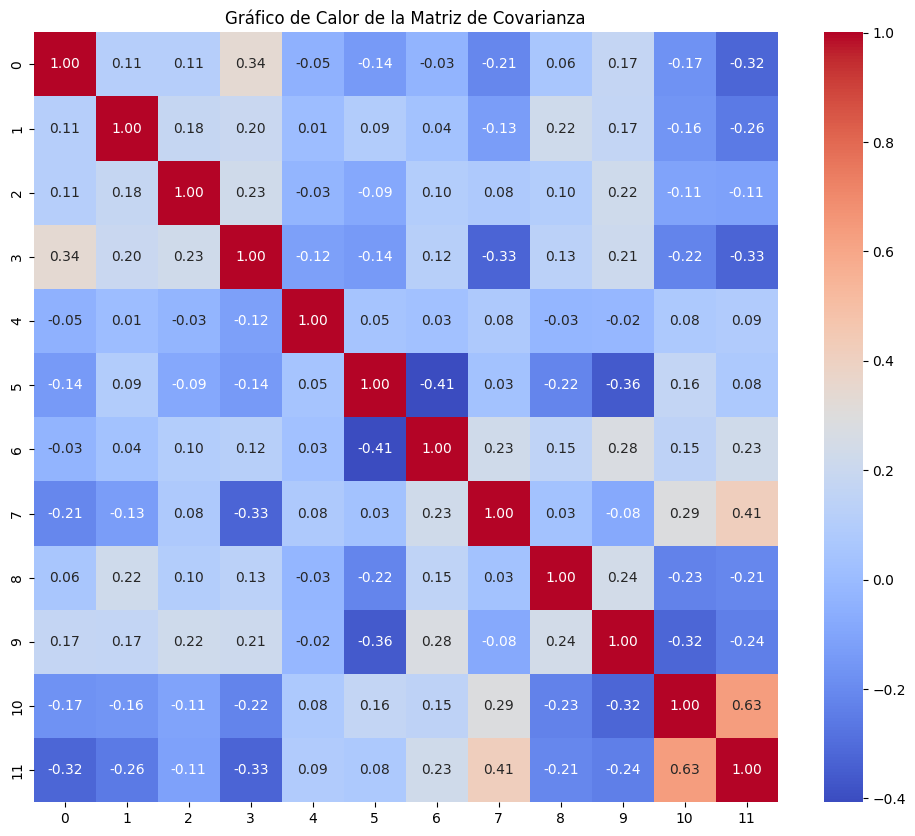

In [106]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cov_matrix = np.cov(data_scaled, rowvar=False)
print("Matriz de Covarianza:\n", cov_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Gráfico de Calor de la Matriz de Covarianza")
plt.show()


Bloque 4: PCA y Selección de Componentes

In [107]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data_scaled)
varianza_explicada_acumulativa = np.cumsum(pca.explained_variance_ratio_)
print("Varianza Explicada Acumulativa:\n", varianza_explicada_acumulativa)

num_components_80 = np.where(varianza_explicada_acumulativa >= 0.8)[0][0] + 1
print("Número de componentes necesarios para explicar al menos el 80% de la varianza:", num_components_80)

pca_reducido = PCA(n_components=num_components_80)
data_pca_reducido = pca_reducido.fit_transform(data_scaled)


Varianza Explicada Acumulativa:
 [0.23701361 0.38934721 0.48586596 0.57655419 0.65770425 0.72996581
 0.79401789 0.85033504 0.89602591 0.94055039 0.97324185 1.        ]
Número de componentes necesarios para explicar al menos el 80% de la varianza: 8


Método del codo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

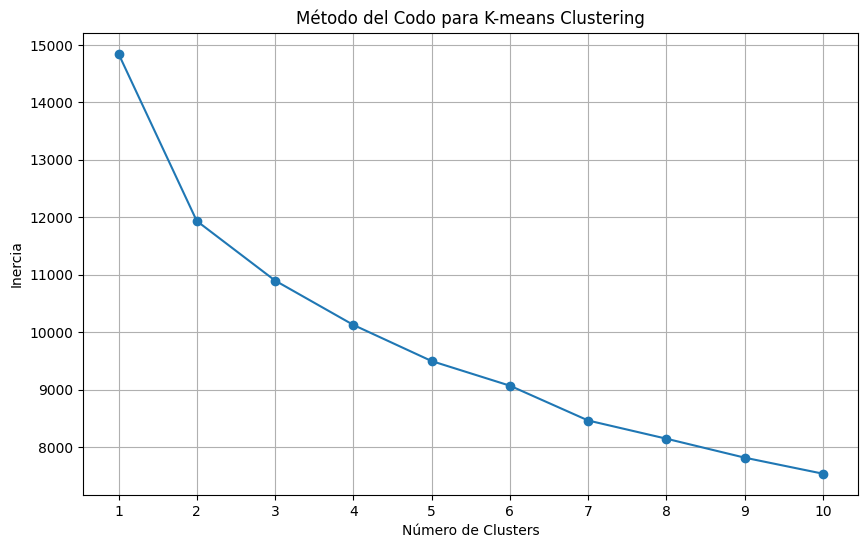

In [108]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determinar el número óptimo de clusters usando el método del codo
inertias = []
k_values = range(1, 11)  # Puedes ajustar este rango según tu necesidad

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca_reducido)
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, marker='o')
plt.title('Método del Codo para K-means Clustering')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


Metodo de la silueta

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

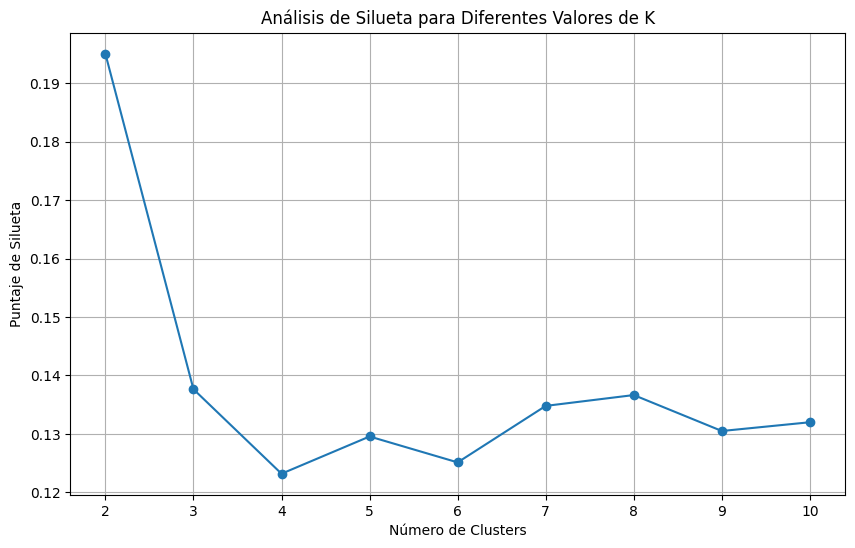

In [109]:
from sklearn.metrics import silhouette_score

# Asumiendo que ya hemos importado KMeans y que tenemos 'data_normalized'
silhouette_scores = []
k_values = range(2, 11)  # Empezando desde 2 porque la silueta no se puede calcular con un solo cluster

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_pca_reducido)
    silhouette_avg = silhouette_score(data_pca_reducido, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar los valores de silueta para cada K
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Análisis de Silueta para Diferentes Valores de K')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntaje de Silueta')
plt.xticks(k_values)
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 3 El promedio de la silueta es : 0.1376482036188583


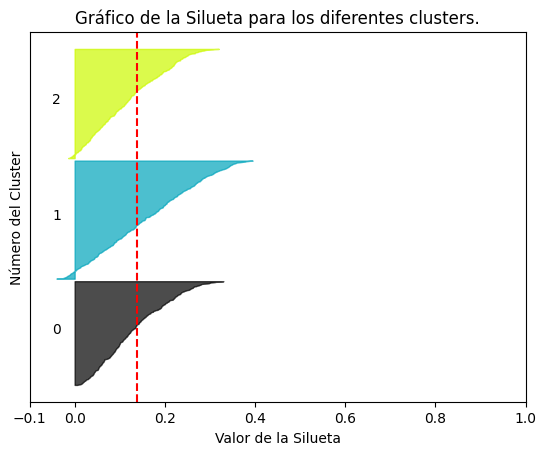

In [110]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

def plot_silhouette(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("Para n_clusters =", n_clusters, "El promedio de la silueta es :", silhouette_avg)

    # Calcular los valores de silueta para cada muestra
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    fig, ax = plt.subplots()

    for i in range(n_clusters):
        # Agregar los valores de silueta del i-ésimo cluster y ordenarlos
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        # Etiquetar los gráficos de silueta con el número del cluster en el centro
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Calcular el nuevo y_lower para el próximo gráfico
        y_lower = y_upper + 10

    ax.set_title("Gráfico de la Silueta para los diferentes clusters.")
    ax.set_xlabel("Valor de la Silueta")
    ax.set_ylabel("Número del Cluster")

    # Línea vertical para el promedio de la silueta de todos los valores
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Limpiar las etiquetas de y
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

# Ejemplo de uso para K=3
plot_silhouette(data_pca_reducido, 3)


Bloque 5: Clustering y Visualización de Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


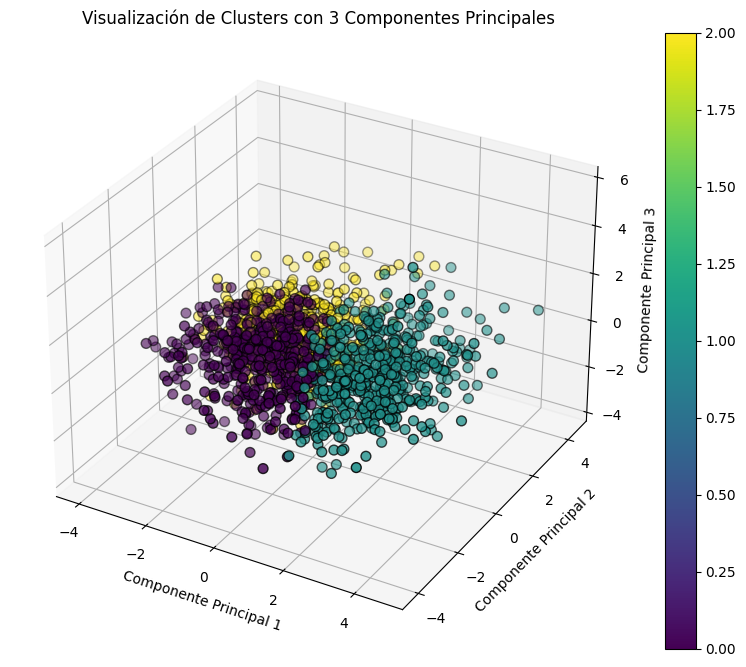

In [111]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(data_pca_reducido)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_pca_reducido[:, 0], data_pca_reducido[:, 1], data_pca_reducido[:, 2],
                     c=cluster_labels, cmap='viridis', edgecolor='k', s=50)

ax.set_title('Visualización de Clusters con 3 Componentes Principales')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.colorbar(scatter)
plt.show()


Varios PCA graficados

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


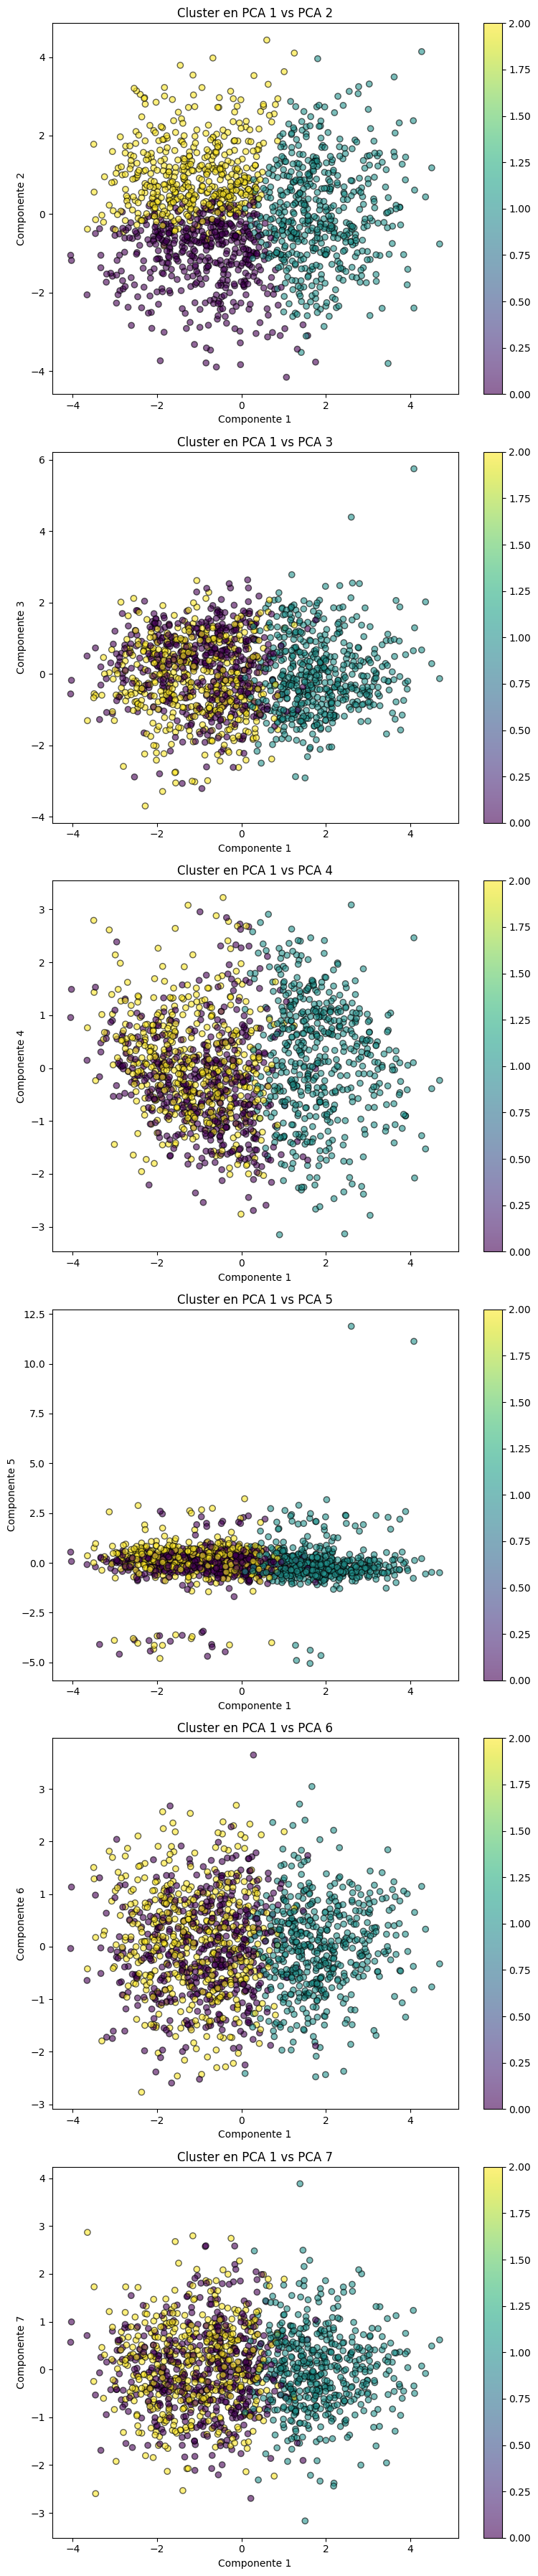

In [113]:
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Aplicar K-means para clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(data_pca_reducido)

# FunciÃ³n para graficar pares de componentes principales
def plot_pca_clusters(data, labels, components_list):
    fig, axs = plt.subplots(len(components_list), 1, figsize=(8, 6 * len(components_list)))
    if len(components_list) == 1:
        axs = [axs]  # para asegurarnos de que axs sea iterable
    for ax, (comp1, comp2) in zip(axs, components_list):
        scatter = ax.scatter(data[:, comp1], data[:, comp2], c=labels, cmap='viridis', edgecolor='k', alpha=0.6)
        ax.set_title(f'Cluster en PCA {comp1 + 1} vs PCA {comp2 + 1}')
        ax.set_xlabel(f'Componente {comp1 + 1}')
        ax.set_ylabel(f'Componente {comp2 + 1}')
        plt.colorbar(scatter, ax=ax)
    plt.tight_layout()
    plt.show()

# Lista de pares de componentes para graficar
pairs_to_plot = list(combinations(range(8), 2))[:6]  # seleccionar los primeros 6 pares para visualizaciÃ³n

# Llamar a la funciÃ³n con los pares seleccionados
plot_pca_clusters(data_pca_reducido, cluster_labels, pairs_to_plot)



Puntos por cluster

In [114]:
data['Cluster'] = cluster_labels
# Contar el número de puntos en cada cluster
cluster_counts = data['Cluster'].value_counts()
print(cluster_counts)

Cluster
1    519
2    480
0    456
Name: count, dtype: int64


# Clustering Jerarquico

Bloque 1: Clustering Jerárquico

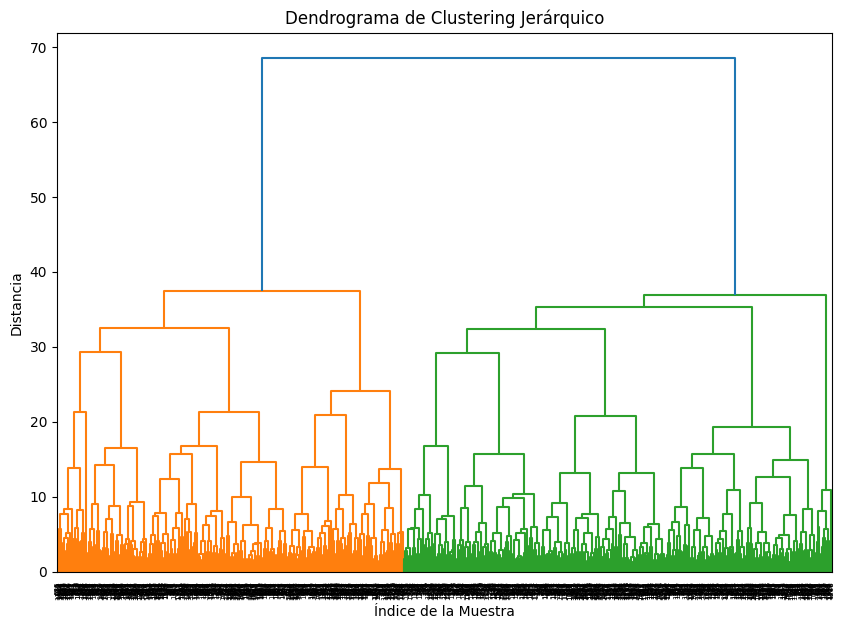

In [115]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generar el linkage matrix usando el método de 'ward'
linked = linkage(data_pca_reducido, 'ward')

# Dendrograma para visualizar el clustering
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Índice de la Muestra')
plt.ylabel('Distancia')
plt.show()


In [116]:
from scipy.cluster.hierarchy import fcluster

# Decidir la altura de corte
altura_corte = 50  # Este valor puede ajustarse según tu análisis visual del dendrograma

# Usar fcluster para asignar clusters basado en la altura de corte
clusters = fcluster(linked, altura_corte, criterion='distance')

# Contar cuántos puntos hay en cada cluster
num_clusters = np.unique(clusters)
cluster_counts = {label: np.sum(clusters == label) for label in num_clusters}

print("Número de clusters formados:", len(num_clusters))
print("Conteo de puntos por cluster:", cluster_counts)


Número de clusters formados: 2
Conteo de puntos por cluster: {1: 804, 2: 651}


Bloque 2: Cortar el Dendrograma para Formar Clusters

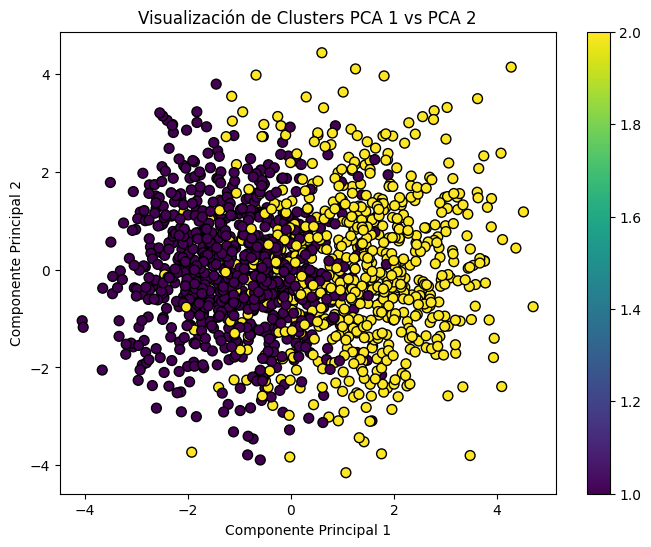

In [117]:
from scipy.cluster.hierarchy import fcluster

# Cortar el dendrograma en la distancia que forme 'k' clusters
k = 2  # Número de clusters deseado
clusters = fcluster(linked, k, criterion='maxclust')

# Mapear los clusters obtenidos a los datos originales (opcional)
data['Cluster'] = clusters  # Asumiendo que 'data' es tu DataFrame original

# Visualizar cómo se distribuyen los clusters (opcional)
plt.figure(figsize=(8, 6))
plt.scatter(data_pca_reducido[:, 0], data_pca_reducido[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.title('Visualización de Clusters PCA 1 vs PCA 2')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()
plt.show()


# Analisis de clusters Vs Labels

In [119]:
# Instalación e importación de paquetes necesarios
!pip install ucimlrepo

Bloque 1: Carga y Preparación de Datos

In [165]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Carga de datos
drug_consumption_quantified = fetch_ucirepo(id=373)
X = drug_consumption_quantified.data.features
y = drug_consumption_quantified.data.targets

# Verificar y ajustar 'y'
if isinstance(y, pd.DataFrame):
    print("Columnas en y:", y.columns)  # Imprimir columnas para verificar
    print("Columnas en x:", X.columns)
    print(X.head())  # Imprimir datos para tomar una decisión informada
    print(y.head())  # Imprimir datos para tomar una decisión informada
    y = y.iloc[:, 0]  # Asumir que la primera columna es la correcta después de la verificación

# Binarización de etiquetas (asegúrate de que y sea ahora una Serie)
y = y.replace("CL0", 0)
y = y.replace("CL1", 0)
y = y.replace("CL2", 1)
y = y.replace("CL3", 1)
y = y.replace("CL4", 1)
y = y.replace("CL5", 1)
y = y.replace("CL6", 1)

print(y.head())

# Normalización de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Columnas en y: Index(['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc',
       'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd',
       'meth', 'mushrooms', 'nicotine', 'semer', 'vsa'],
      dtype='object')
Columnas en x: Index(['age', 'gender', 'education', 'country', 'ethnicity', 'nscore',
       'escore', 'oscore', 'ascore', 'cscore', 'impuslive', 'ss'],
      dtype='object')
       age   gender  education  country  ethnicity   nscore   escore   oscore  \
0  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545 -0.58331   
1 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
2  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
3 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
4  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   

    ascore   cscore  impuslive       ss  
0 -0.91699 -0.00665   -0.21712 -1.18084  
1  0.76096 -

Bloque 2: PCA y Clustering

In [153]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# PCA para reducir la dimensionalidad
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

# Aplicación de K-means para el clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Bloque 3: Evaluación de Clusters con Tabulaciones Cruzadas y Visualización

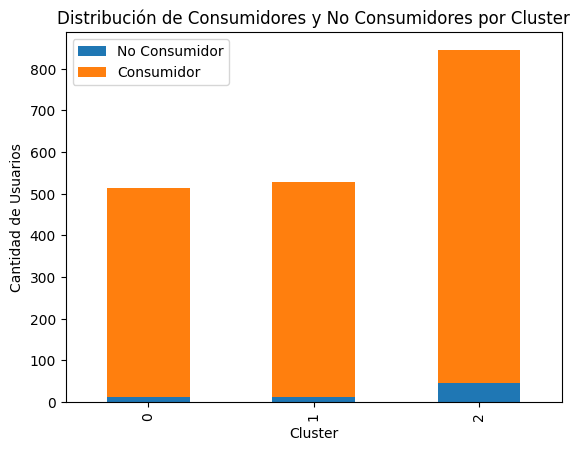

In [155]:
import matplotlib.pyplot as plt

# Agregar clusters y consumo al DataFrame para la evaluación
data = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(8)])
data['Cluster'] = clusters
data['Consumo'] = y  # Usando 'y' ya verificado y ajustado

# Crear una tabla cruzada
crosstab = pd.crosstab(data['Cluster'], data['Consumo'])

# Visualización con diagrama de barras
crosstab.plot(kind='bar', stacked=True)
plt.title('Distribución de Consumidores y No Consumidores por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Cantidad de Usuarios')
plt.legend(["No Consumidor", "Consumidor"])
plt.show()
